In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
np.random.seed(1907)


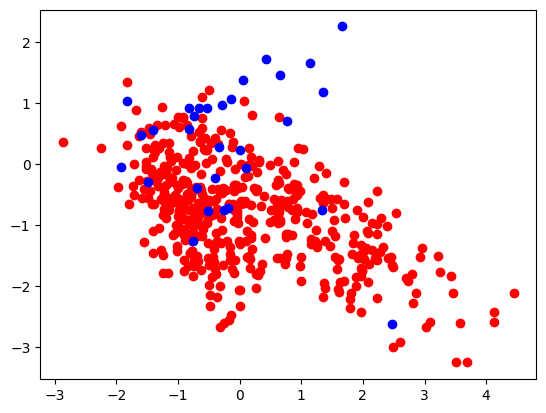

In [2]:
X, y = make_classification(n_samples=500, class_sep=0.8,n_features=2, n_informative=2, n_redundant=0, weights=[0.95, 0.05], random_state=1907)
plt.figure()
plt.scatter(X[y==0][:,0],X[y==0][:,1],c="red")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c="blue")
plt.show()


## Without weights

[None]

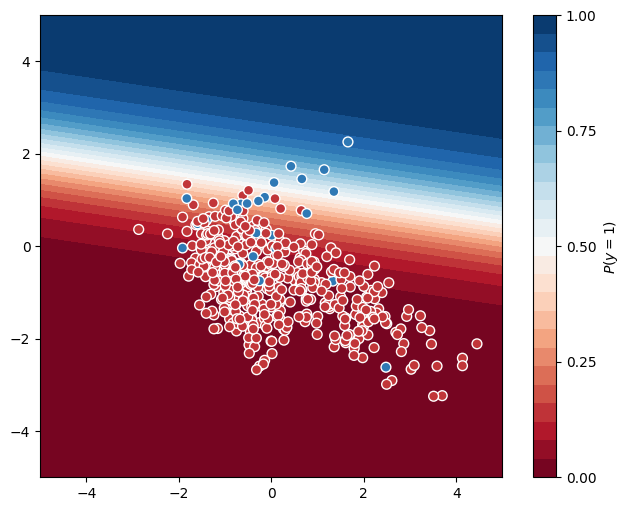

In [3]:
logr = LogisticRegression(random_state=1907)
logr.fit(X,y)

#Create combination of features 1 and 2
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

#Make the prediction on each couple (f1,f2)
probs = logr.predict_proba(grid)[:, 1].reshape(xx.shape)

#Plot the probabilities
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal")

## With weights

[None]

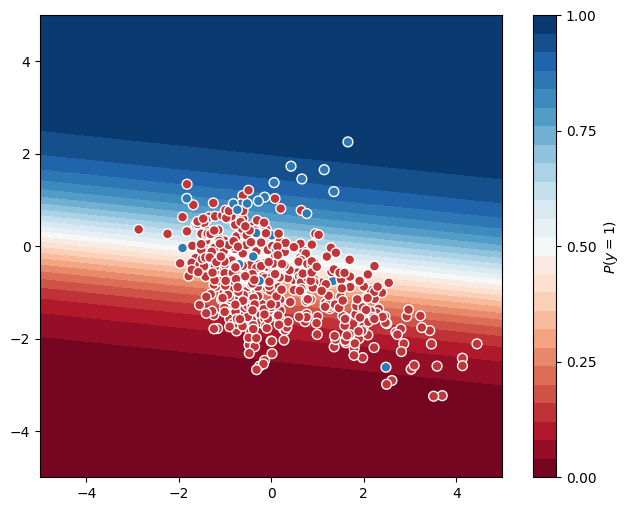

In [4]:
logr_balance = LogisticRegression(random_state=1907, class_weight="balanced")
logr_balance.fit(X,y)

#Create combination of features 1 and 2
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

#Make the prediction on each couple (f1,f2)
probs = logr_balance.predict_proba(grid)[:, 1].reshape(xx.shape)

#Plot the probabilities
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal")

## Function to get the weights

In [5]:
imbalanced_y = [0 if i < 10 else 1 for i in range(13)]
weights = compute_class_weight(class_weight="balanced",classes=np.unique(imbalanced_y),y=imbalanced_y)
weights

array([0.65      , 2.16666667])